### Assignment 5
#### Aryan Sethi (21BCE0704)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import warnings

In [19]:
data = pd.read_csv("E:\\VSCode_workshop\\python_workshop\\Mall_Customers (1).csv")
warnings.filterwarnings('ignore')

Data Preprocessing

In [20]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [21]:
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [22]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)

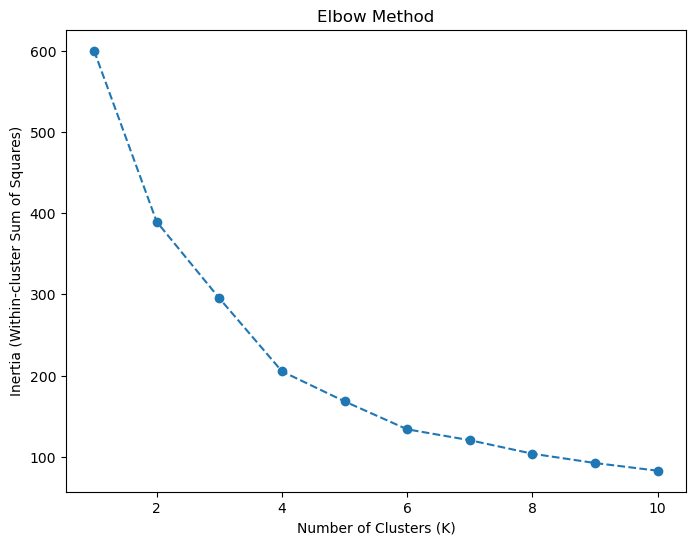

In [23]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

In [24]:
# K-Means clustering with K = 5
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

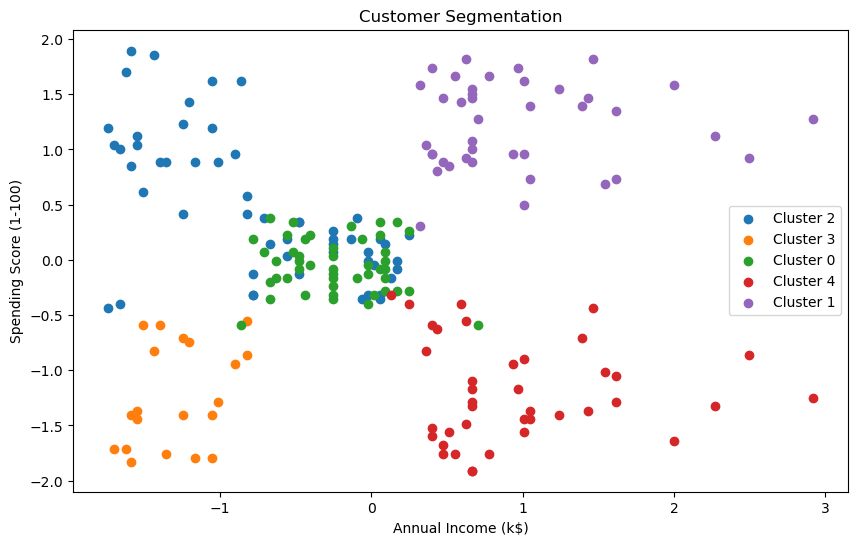

In [25]:
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()